## E como trabalhamos com as features quando temos séries temporais?

In [1]:
# importar as bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Temos o histórico de vendas de uma rede de lojas
train_df = pd.read_csv('train.csv')
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
#para facilitar nossa vida vamos selecionar apenas uma loja
df = train_df.loc[train_df['store'] == 1]
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
#criar um DataFrame com a venda diária total

df2 = (df.groupby(['date']).sum())
partial_df = pd.DataFrame()
partial_df['date'] = df['date'].unique()
partial_df['sales'] = df2['sales'].values.tolist()
partial_df.head()

,date,sales
0,2013-01-01,1316
1,2013-01-02,1264
2,2013-01-03,1305
3,2013-01-04,1452
4,2013-01-05,1499


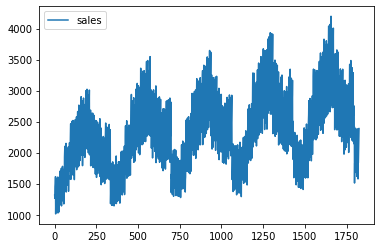

In [5]:
partial_df.plot();

In [6]:
# podemos criar variáveis que nos passam a informação sobre os ciclos de cada ano

partial_df['date'] = pd.to_datetime(partial_df['date'])

partial_df['day_of_year'] = partial_df.date.apply(lambda x: x.dayofyear)
partial_df['week_of_year'] = partial_df.date.apply(lambda x: x.weekofyear)

partial_df.head()

,date,sales,day_of_year,week_of_year
0,2013-01-01,1316,1,1
1,2013-01-02,1264,2,1
2,2013-01-03,1305,3,1
3,2013-01-04,1452,4,1
4,2013-01-05,1499,5,1


In [7]:
# criar informação sobre os dias úteis

ddd = (pd.bdate_range(start='2013-01-01', end='2017-12-31')).values
partial_df['working_days'] = np.where(partial_df['date'].isin(ddd), 1, 0)
partial_df.head()

,date,sales,day_of_year,week_of_year,working_days
0,2013-01-01,1316,1,1,1
1,2013-01-02,1264,2,1,1
2,2013-01-03,1305,3,1,1
3,2013-01-04,1452,4,1,1
4,2013-01-05,1499,5,1,0


In [8]:
## Pordemos usar como entrada de um modelo de ML datas?
## Vamos separar a colunas de data em 3

partial_df["day"] = partial_df['date'].map(lambda x: x.day)
partial_df["month"] = partial_df['date'].map(lambda
                                             x: x.month)
partial_df["year"] = partial_df['date'].map(lambda x: x.year)
partial_df.head()

,date,sales,day_of_year,week_of_year,working_days,day,month,year
0,2013-01-01,1316,1,1,1,1,1,2013
1,2013-01-02,1264,2,1,1,2,1,2013
2,2013-01-03,1305,3,1,1,3,1,2013
3,2013-01-04,1452,4,1,1,4,1,2013
4,2013-01-05,1499,5,1,0,5,1,2013


In [9]:
## podemos também atribuir começo e fim de ciclos

partial_df['month_initial'] = partial_df['date'].dt.is_month_start
partial_df['month_end'] = partial_df['date'].dt.is_month_end
partial_df['start_quarter'] = partial_df['date'].dt.is_quarter_start
partial_df['week_day'] = partial_df['date'].dt.dayofweek

partial_df.head()

,date,sales,day_of_year,week_of_year,working_days,day,month,year,month_initial,month_end,start_quarter,week_day
0,2013-01-01,1316,1,1,1,1,1,2013,True,False,True,1
1,2013-01-02,1264,2,1,1,2,1,2013,False,False,False,2
2,2013-01-03,1305,3,1,1,3,1,2013,False,False,False,3
3,2013-01-04,1452,4,1,1,4,1,2013,False,False,False,4
4,2013-01-05,1499,5,1,0,5,1,2013,False,False,False,5


In [10]:
## podemos dizer se é final ou começo de mês
partial_df['initial_month_raquel'] = np.where(partial_df['day'].isin([1, 2, 3, 4]), 1, 0)
partial_df.head()

,date,sales,day_of_year,week_of_year,working_days,day,month,year,month_initial,month_end,start_quarter,week_day,initial_month_raquel
0,2013-01-01,1316,1,1,1,1,1,2013,True,False,True,1,1
1,2013-01-02,1264,2,1,1,2,1,2013,False,False,False,2,1
2,2013-01-03,1305,3,1,1,3,1,2013,False,False,False,3,1
3,2013-01-04,1452,4,1,1,4,1,2013,False,False,False,4,1
4,2013-01-05,1499,5,1,0,5,1,2013,False,False,False,5,0


In [13]:
# podemos ver como está o comportamento esta mudando ao longo do tempo 
# através da média do volume de vendas
janela = 7
partial_df['media_semanal'] = partial_df['sales'].rolling(window=janela).mean().round(4)
partial_df.head(10)

,date,sales,day_of_year,week_of_year,working_days,day,month,year,month_initial,month_end,start_quarter,week_day,initial_month_raquel,media_semanal
0,2013-01-01,1316,1,1,1,1,1,2013,True,False,True,1,1,NaN
1,2013-01-02,1264,2,1,1,2,1,2013,False,False,False,2,1,NaN
2,2013-01-03,1305,3,1,1,3,1,2013,False,False,False,3,1,NaN
3,2013-01-04,1452,4,1,1,4,1,2013,False,False,False,4,1,NaN
4,2013-01-05,1499,5,1,0,5,1,2013,False,False,False,5,0,NaN
5,2013-01-06,1613,6,1,0,6,1,2013,False,False,False,6,0,NaN
6,2013-01-07,1012,7,2,1,7,1,2013,False,False,False,0,0,1351.5714
7,2013-01-08,1228,8,2,1,8,1,2013,False,False,False,1,0,1339.0000
8,2013-01-09,1243,9,2,1,9,1,2013,False,False,False,2,0,1336.0000
9,2013-01-10,1339,10,2,1,10,1,2013,False,False,False,3,0,1340.8571


In [14]:
#através da variação do volume de vendas 
partial_df['variacao_%_semanal'] = partial_df['sales'].pct_change(janela-1).round(4)
partial_df.head(10)

,date,sales,day_of_year,week_of_year,working_days,day,month,year,month_initial,month_end,start_quarter,week_day,initial_month_raquel,media_semanal,variacao_%_semanal
0,2013-01-01,1316,1,1,1,1,1,2013,True,False,True,1,1,NaN,NaN
1,2013-01-02,1264,2,1,1,2,1,2013,False,False,False,2,1,NaN,NaN
2,2013-01-03,1305,3,1,1,3,1,2013,False,False,False,3,1,NaN,NaN
3,2013-01-04,1452,4,1,1,4,1,2013,False,False,False,4,1,NaN,NaN
4,2013-01-05,1499,5,1,0,5,1,2013,False,False,False,5,0,NaN,NaN
5,2013-01-06,1613,6,1,0,6,1,2013,False,False,False,6,0,NaN,NaN
6,2013-01-07,1012,7,2,1,7,1,2013,False,False,False,0,0,1351.5714,-0.2310
7,2013-01-08,1228,8,2,1,8,1,2013,False,False,False,1,0,1339.0000,-0.0285
8,2013-01-09,1243,9,2,1,9,1,2013,False,False,False,2,0,1336.0000,-0.0475
9,2013-01-10,1339,10,2,1,10,1,2013,False,False,False,3,0,1340.8571,-0.0778


In [ ]:
## há ainda a possibilidade de vocês trabalharem com correlação entre colunas em diferentes intervalos de tempo

### Mais um exercício 

1. Faça a geração de features de um data 